# NBD - Final Project -  Networking

![](http://www.chinacablesbuy.com/wp-content/uploads/2018/09/Top-of-Rack-Network-Connectivity.jpeg)


- Francesco Russo (1449025)
- Iason Tsardanidis (1846834)
- Michele Cernigliaro (1869097)


## Part 1


In [1]:
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import time
import matplotlib.pyplot as plt
%matplotlib inline

### - Write a script to generate an p-ER random graph.
### - Write a script to generate an r-regular random graph.
### - Write a script to check the connectivity of a given graph.
- algebraic method 1 (irreducibility);
- algebraic method 2 (eigenvalue of the Laplacian matrix);
- breadth-first search algorithm.

In [2]:
class Error(Exception):
...     def __init__(self, value):
...         self.value = value
...     def __str__(self):
...         return repr(self.value)

In [3]:
class Random_Graph:
    
    """A class for the creation of a Random Graph and
    the connectivity evaluation measures"""
   
    def __init__(self,method,attr1,attr2,use_libr=True):
        
        """
        Random Graph initiallization:
            - method: 1) 'p_ER' --> p-Erdos Renyi random graph method
                        - attr1 --> number of nodes
                        - attr2 --> probability for edge creation 
                        - use_libr = Boolean (default = True, for networkX package usage)
                        
            - method: 2) 'r_regular' --> r-regular random graph method
                        - attr1 --> number of nodes
                        - attr2 --> degree of the graph
                        - use_libr = Boolean (default = True, for networkX package usage)
                        
        Returns a random graph
                                       
        """
        
        if method == 'p_ER':
            if use_libr == False:
                self.graph = self.p_ER(attr1,attr2)
            else:
                self.graph = nx.gnp_random_graph(attr1,attr2)
        elif method == 'r_regular':
            if use_libr == False:
                self.graph = self.r_regular(attr1,attr2)
            else:
                self.graph = nx.random_regular_graph(attr2,attr1)

            
            
    def r_regular(self,n,d):
    
    
        """
        Input:
        - d: degree of nodes in the graph
        - n: total number of nodes

        Ouput: 
        - graph: a r-regular random graph
        
        """

        if (n * d) % 2 != 0:
            raise Error("n * d must be even")
        
        if not 0 <= d < n:
            raise Error("0 <= d < n inequality must be satisfied")
        self.graph = nx.Graph()
        self.graph.add_nodes_from(nx.path_graph(n))
        # initialize link, a list containing every node of the graph with degree less than d
        links = list(range(n))
        flag = False
        while len(links)>1:
            # sample two items from the set of those nodes
            nodeA,nodeB = random.sample(links, 2)

            while (self.graph.has_edge(nodeA,nodeB) and len(links) != 2):
                # randomly select 2 nodes and check if the 2 nodes are already connected
                nodeA,nodeB = random.sample(links, 2)

            self.graph.add_edge(nodeA,nodeB)
            if self.graph.degree[nodeA] == d:
                links.remove(nodeA)
            if self.graph.degree[nodeB] == d:
                links.remove(nodeB)
            if len(links) == 2:
                if flag == True: #if we call the same couple f nodes twice --> flag:True
                    break
                flag = True
        if len(links) >= 1:
            self.graph = self.r_regular(n,d)
        return(self.graph)
            
    def p_ER(self,n,p) :
        
        """
        Input:
        - n: total number of nodes in the graph
        - p: probability that two nodes are connected 

        Ouput: 
        - graph: a p-Erdos Renyi random graph
        
        """
        
        if not 0 <= p <= 1:
            raise Error("p must be between [0,1]")

        self.graph = nx.Graph()
        for nodeA in range(n) :
            for nodeB in range((nodeA+1),n):
                prob = random.uniform(0,1)
                if prob < p:
                    self.graph.add_edge(nodeA,nodeB)

        return(self.graph)
    
    
    def Irreducibility(self):
        
        """
        
        This function checks the connectivity of a graph testing its irreducibility.

        Input:
        - a graph

        Output:
        - True if the graph is connected, False otherwise
        
        """
        
        A = nx.to_numpy_matrix(self.graph)
        n = A.shape[0]
        S = np.identity(n)
        for k in range(n):
            S += np.linalg.matrix_power(A,k)
        if S.all() > 0: 
            return(True)
        else:
            return(False)
        
        
    def BFS_distances(self,start):
    
        '''
        
        This function evaluates the distance of all the shortest path using Breadth First Search algorithm
        from a starting node to all the other nodes of the graph.

         - Input: a graph and its starting node.

         - Output: a dictionary in which keys the nodes IDs and values the distances 
             of each node of the graph from the starting one.
            
        '''


        # Check if the start node is in the graph
        if start not in self.graph.nodes():
            return("The start node is not in the graph.")
        #defining an empty count dictionary of seen dictionaty with default tuple values (False,-1)
        #of vertices we have computed the shortest_path
        seen = defaultdict(lambda:(False,-1))
        #defining of the first initial start vertex with values (True,0)
        seen[start] = (True,0)
        #new queue abstract data structure with initial value of the starting vertex we want all the distances from
        queue = [start]
        #while queue is not empty
        while len(queue) != 0:
            #set as current vertex the first element inserted into the queue from that inside
            current = queue.pop(0)
            #define as d the the distance from the current vertex to the starting one
            d = seen[current][1] 
            #running a loop for all the neighbors/successors of the current node
            for neighbor in self.graph[current]:
                #condition: if we haven't seen this vertex until now --> TRUE
                if not seen[neighbor][0]:
                    #we increase the distance of the current vertex by 1 and we assing TRUE value
                    # in order to know that we have already visited it
                    seen[neighbor] = (True,d+1)
                    #we are appending into the queue the seen neighbor vertex
                    queue.append(neighbor)
        # we create a results dictionary with default distances equal to -1
        sh_paths = defaultdict(lambda:-1)
        # we assing at every vertex the computed distance
        for vertex in seen.keys():
            sh_paths[vertex] = seen[vertex][1]
        return sh_paths
    
    

    def BFS(self):
        
        '''
        
        This function checks if a graph is connected using the Breath First Search algorithm.

        Input:
        
        - a  graph

        Output: 
        
        - True if the graph is connected, False otherwise
        
        '''
        
        for start in self.graph.nodes():
            distances = self.BFS_distances(start)
            if len(distances) < len(self.graph.nodes()):   
                return(False)
        return(True)

    
    def Laplacian(self):
        
        """
        
        This function checks the connectivity of a graph through the Laplacian matrix.

        Input:
        - a graph

        Output:
        - True if the graph is connected, False otherwise
        
        """
        # graph adjacency matrix
        A = nx.to_numpy_matrix(self.graph)
        # diagonal matrix matrix containing degrees
        D = np.diag([d[1] for d in self.graph.degree()])
        # Laplacian matrix
        L = D-A
        eigenvalues = np.sort(np.linalg.eigvalsh(L))
        #print(eig)
        if eigenvalues[1] > 10e-7: 
            return(True)
        else: 
            return(False)
        
    def all_shortest_paths(self):
        
        """
        For each node of self.graph compute all its distances with the others nodes
        using BFS algorithm (Dijkstra with unweighted arcs)

        Output:
        - d: dictionary of dictionaries - each node has a dictionary of all the shortes paths
        """
        
        d = {}

        for node in self.graph.nodes():
            d[node] = dict(self.BFS_distances(node))

        return d
    
    def estimate_h (self):
        
        """
        Estimate from self.graph the mean path length, by taking all the distances for each node
        and computing it according to the formula sum(D_ij)/(n*(n-1))
        Where D_ij is the shortest path between i and j (i!=j) and n is the total number of nodes

        Output
        - h_hat: mean path length
        """

        n = len(self.graph.nodes())
        d = self.all_shortest_paths()

        distances = []
        for node in d.keys():
            distances += list(d[node].values())
        return (np.sum(distances) / (n*(n-1)))
        #return np.mean(distances)
    
    
    def compute_throughput(self):
        
        """
        Function which compute Throughput from self.graph instance
        
        output:
        - TH
        """
        
        n = len(self.graph.nodes())
        v = n*(n-1)/2
        
        m = len(self.graph.edges())
        h_hat = self.estimate_h()
        
        TH = m /(h_hat*v)
        return (TH)

Write a script to check the connectivity of a given graph.
- algebraic method 1 (irreducibility);
- algebraic method 2 (eigenvalue of the Laplacian matrix);
- breadth-first search algorithm.


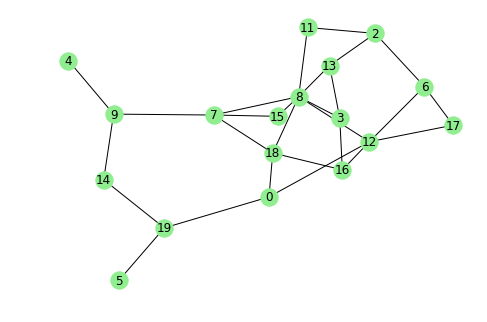

In [4]:
# Plot the p_ER random graph
G = Random_Graph('p_ER',20,0.2,False).graph
nx.draw(G,with_labels=True,node_color="lightgreen")

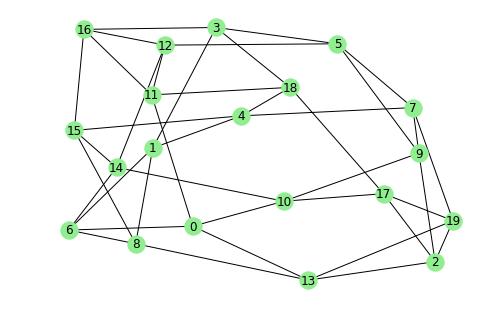

In [5]:
# Plot the r_regular random graph
G = Random_Graph('r_regular',20,4,False).graph
nx.draw(G,with_labels=True,node_color="lightgreen")

### Compare the complexity as a function of n of the methods above by plotting curves of a complexity measure vs n.

### Irreducibility: 
    
   * $O(\sum_{k=0}^{n-1} k*n^3) = n^3* \frac{n*(n-1)}{2} = O(n^5)$

### Laplacian: 

   * $O(n*logn*n^3) = O(n^4logn)$

### BFS: 

   * $O(n*(V + E)) = O(n*(n + \frac{n*(n-1)}{2})) = O(n^3)$

In [6]:
current_time_msec = lambda: int(round(time.time() * 1000))


def complexity(nodes,n_sim = 50):
    
    """
    
    This function computes the average time after (10) execution of computing the connectivity of
    a random_graph size (n) with every connectivity method.
    
    -Input: The number of nodes
    
    -Output: A numpy array of size (3 x 1) with the average_time for checking the connectivity with 
    *Irreducibility
    *Laplacian
    *Breadth First Search
    
    """
    
    complx_time = np.array([])
    methods = ['Irreducibility()','Laplacian()','BFS()']
    G = Random_Graph('p_ER',nodes,0.6)
    for method in methods:
        l = np.array([])
        for j in range(n_sim):
            ts_start = int(current_time_msec())
            if method == 'BFS()':
                t = nx.is_connected(G.graph) #use networkX function for BFS connectivity
            else:
                t = eval('G.'+ method)  #use the class method
            l = np.append(l,int(current_time_msec())-ts_start)
        complx_time = np.append(complx_time,np.mean(l))
        
    return(complx_time)

## Complexity Plots

/home/jason/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


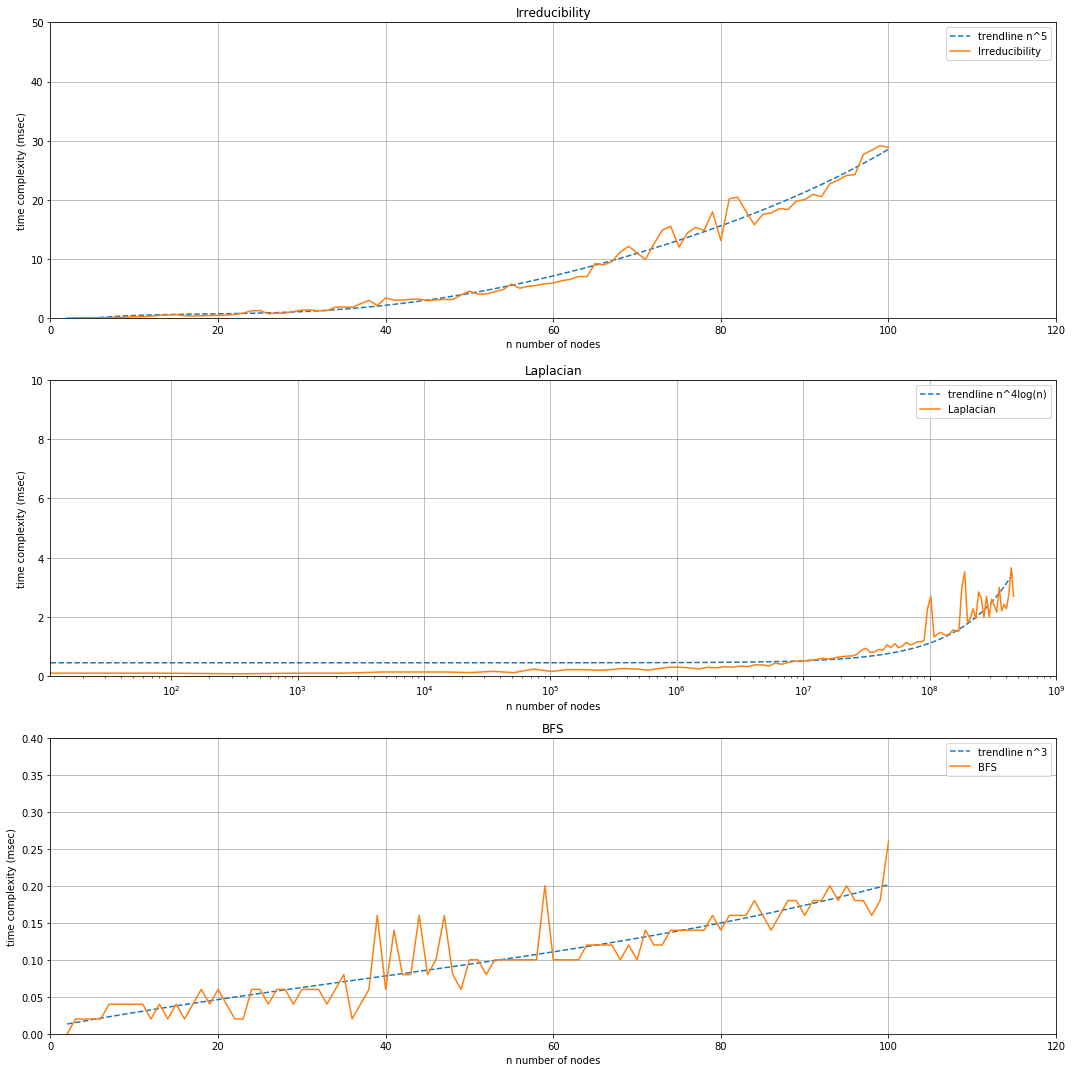

In [7]:

methods = ['Irreducibility','Laplacian','BFS']
compl = ['n^5','n^4log(n)','n^3']

m = [[] for x in range(3)]
n = list(range(2,101))

fig, axs = plt.subplots(3, 1,figsize=(15,15))
for i in range(3):
    for nodes in n: 
        complx_time = complexity(nodes)
        m[i].append(complx_time[i])
    if i==0:
        axs[i].set_xscale('linear')
        coefficients = np.polyfit(n,m[i],5)
        fit = np.poly1d(coefficients)
        axs[i].plot(n,fit(n),"--", label="trendline "+compl[i])
        axs[i].plot(n,m[i],label=methods[i])
        axs[i].set_ylim(0,50)
        axs[i].set_xlim(0,120)
    elif i==1:
        axs[i].set_xscale('log')
        x = np.power(n,4)*np.log(n)
        coefficients = np.polyfit(x,m[i],1)
        fit = np.poly1d(coefficients)
        axs[i].plot(x,fit(x),"--", label="trendline "+compl[i])
        axs[i].plot(x,m[i],label=methods[i])
        axs[i].set_ylim(0,10)
        axs[i].set_xlim(0,10**9)
    else:
        axs[i].set_xscale('linear')
        coefficients = np.polyfit(n,m[i],3)
        fit = np.poly1d(coefficients)
        axs[i].plot(n,fit(n),"--", label="trendline "+compl[i])
        axs[i].plot(n,m[i],label=methods[i])
        axs[i].set_ylim(0,0.4)  
        axs[i].set_xlim(0,120)
    axs[i].legend()
    axs[i].set_xlabel('n number of nodes')
    axs[i].set_ylabel('time complexity (msec)')
    axs[i].set_title(methods[i])
    axs[i].grid()
    
plt.tight_layout()
# plt.savefig('fig_1.png')

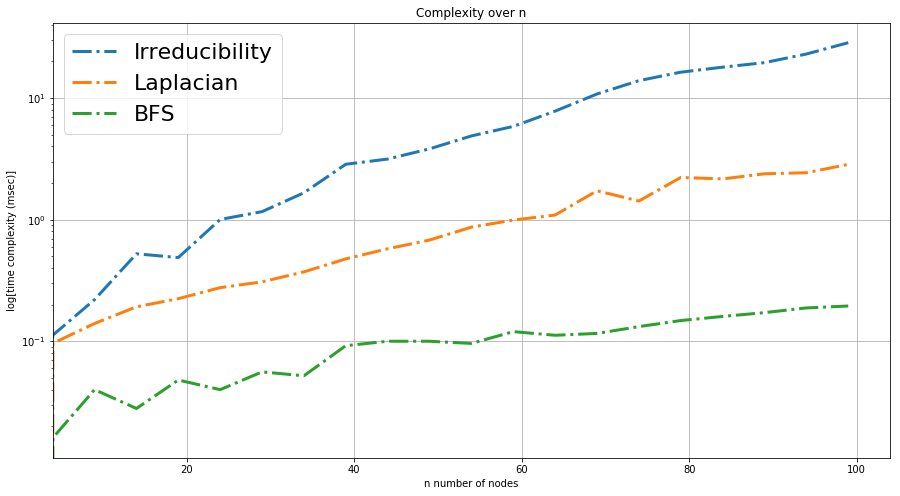

In [8]:
step = 5
n = [0]
n.extend(list(range(step-1,101,step)))
plt.figure(figsize=(15,8))
plt.yscale('log')
for k in range(3):
    oo = m[k]
    averages = [0]
    averages.extend([sum(oo[i:i+step])/len(oo[i:i+step]) for i in range(0,len(oo),step)])
    plt.plot(n,averages,'-.',label=methods[k],linewidth=3)
plt.title('Complexity over n')
plt.xlabel('n number of nodes')
plt.ylabel('log[time complexity (msec)]')
plt.xlim(step-1)
plt.legend(loc = 2, prop={'size': 22},frameon=True)
plt.grid()
# plt.savefig('fig_2.png')

### Let pc (G) denote the probability that a graph G is connected.By running Monte Carlo simulations estimates pc (G) and produce two curve plots:
- pc (G) vs. p for Erd ̋os-R ́enyi graphs with n = 100.
- pc (G) vs. n, for n ≤ 100, for r-regular random graphs with r = 2 and r = 16.

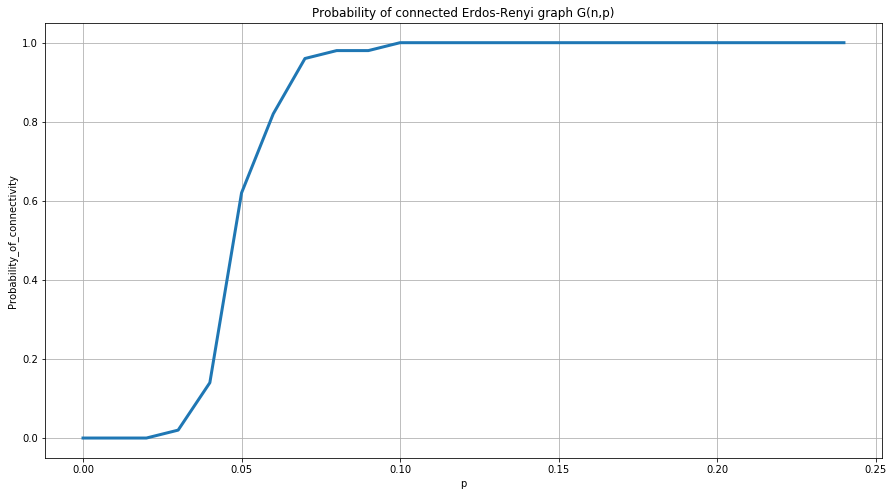

In [9]:
nodes = 100
nsim = 50
prob_range = np.arange(0,0.25,0.01)
pc = []

for prob in prob_range:
    phat = np.array([])
    for _ in range(nsim): 
        G = Random_Graph('p_ER',nodes,prob)
        phat = np.append(phat,nx.is_connected(G.graph))
    pc.append(np.mean(phat))

plt.figure(figsize=(15,8))    
plt.plot(prob_range,pc,linewidth=3)
plt.title("Probability of connected Erdos-Renyi graph G(n,p)")
plt.ylabel("Probability_of_connectivity")
plt.xlabel("p")
plt.grid()
# plt.savefig('fig_3.png')


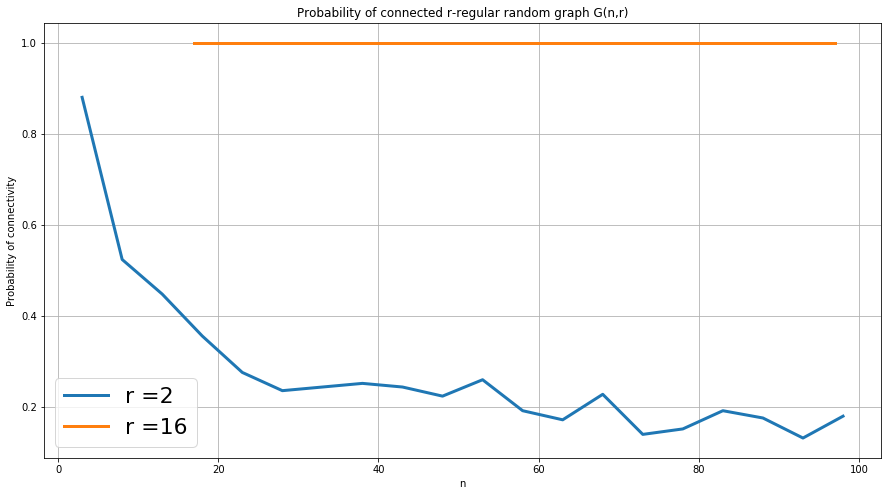

In [10]:
neighb_list = [2,16] 
N = 100
nsim = 50
plt.figure(figsize=(15,8))
step = 5

for neighbours in neighb_list:
    # initiate outcome list
    pc = []
    for nodes in range(neighbours+1,N):
        phat = np.array([])
        for _ in range(nsim): 
            G = Random_Graph('r_regular',nodes,neighbours)
            phat = np.append(phat,nx.is_connected(G.graph))
        pc.append(np.mean(phat))
    averages = [sum(pc[i:i+step])/len(pc[i:i+step]) for i in range(0,len(pc),step)]
    plt.plot( np.array((range(neighbours+1,N,step))),averages, label = 'r =' + str(neighbours),linewidth=3)

plt.title("Probability of connected r-regular random graph G(n,r)")
plt.ylabel("Probability of connectivity")
plt.xlabel("n")
plt.legend(loc = 3, prop={'size': 22},frameon=True)
plt.grid()
# plt.savefig('fig_4.png')

## Part 2

# Throughput performance

## 1. Create one single ToR_switch using a new class

In [11]:
class ToR_switch_layer(Random_Graph):
    """
    Class which implements the construction of a random graph 
    at the Top-of-Rack (ToR) switch layer
    
    It inherits all the functionalities of the Random_Graph class except the constructor
    """
    
    def __init__(self, n, r, max_trials=10):
        """
        Input: 
        - n: number of nodes
        - r: number of switch ports available for the connection to other switches
        - max_trials: parameter used by build_ToR_network method
        
        with build_ToR_network function will be created an instance of the graph
        """
        self.n = n
        self.r = r
        self.graph = self.build_ToR_network(self.n, self.r, max_trials)
    


    def build_ToR_network(self, n, r, max_trials = 10):
        ''' 
        Implement creation of a ToR network through the Jellyfish’s construction.
        The function uses recursive calls in order to build a proper graph 
        which satisfies the ToR network topology

        Input:
        - n (number of nodes)
        - r (number of switch ports available for the connection to other switches)
        - max_trials (maximum number of allowed iteration before recursive function call)


        Output:
        - G (networkx graph)
        '''
        
        # dict, i-th key: node i, i-th values: list of nodes connected to i
        link_dict = defaultdict(list)  
        
        # dict with number of available ports for each node
        available_ports = {}
        
        nodes_list = list(range(n))   # total nodes list
        free_nodes = set(nodes_list)  # list of nodes which have available ports 

        # initialize free_nodes with r ports free for each node
        for node in free_nodes:
            available_ports[node] = r

        # flag counter to prevent infinite loops
        counter = 0
        while len(free_nodes) > 1:
            
            # sample two nodes and their number of available ports
            A, B = random.sample(free_nodes, 2)
            rA = available_ports[A]
            rB = available_ports[B]
            
            # if the nodes sampled have available port and are not already connected
            if (rA > 0 and rB > 0) and (B not in link_dict[A]):
                
                # connect them
                link_dict[A].append(B)
                link_dict[B].append(A)
                
                # decrease the number of free ports
                available_ports[A] = rA - 1
                available_ports[B] = rB - 1
                
                # if A or B have 0 free ports remove them from the list of free_nodes
                if available_ports[A] == 0:
                    free_nodes.remove(A)
                if available_ports[B] == 0:
                    free_nodes.remove(B)
            else:
                # increase the counter 
                counter += 1 
            
            # if we have only two nodes recall the function recursively
            if (len(free_nodes) == 2):
                return self.build_ToR_network(n,r, max_trials)
            
            # if the loop reached max_trials recall the function recursively
            if counter == max_trials:
                return self.build_ToR_network(n,r, max_trials+1)
        
            # end of loop
        
        # if we have only one node i
        if len(free_nodes) == 1:
            
            # take the node i and remove it from nodes_list
            # (in order to sample a node_j != node_i )
            node = free_nodes.pop()
            nodes_list_updated = nodes_list.copy()
            nodes_list_updated.remove(node)
            
            # while node-i has 2 or more available ports 
            while (available_ports[node] >= 2):

                # sample node A from the node_list_updated (list without i-th node)
                A = random.sample(nodes_list_updated, 1)[0]
                # sample node B from the list of nodes connected with A 
                B = random.sample(link_dict[A], 1)[0]

                # if node B is different from i-th and 
                # if node A and B have no links with node-i
                if (B != node) and (B not in link_dict[node]) and (A not in link_dict[node]):

                    # add A to the list of the node-i and viceversa
                    link_dict[node].append(A)
                    link_dict[A].append(node)

                    # add B to the list of the node-i and viceversa
                    link_dict[node].append(B)
                    link_dict[B].append(node)

                    # remove node B from the list of nodes connected to A
                    link_dict[A].remove(B)
                    # remove node A from the list of nodes connected to B
                    link_dict[B].remove(A)

                    available_ports[node] = available_ports[node] - 2  
        
        # return the graph
        G = nx.Graph(link_dict)

        return G

## By re-using the scripts of part 1, write a script that:
- (i) generates a random graph describing the topology of the ToRswitch network; 
- (ii) checks its connectivity; 
- (iii) finds shortest path routes; 
- (iv) estimates h

### 1.a generate a random graph describing the topology of the ToR switch network

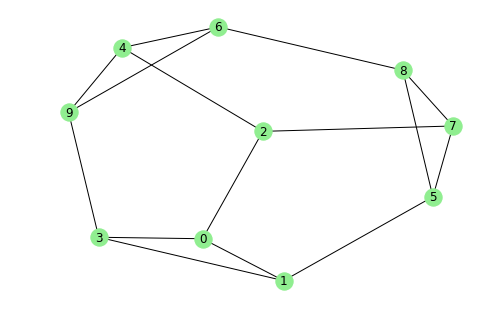

In [12]:
n = 10
r = 3
G = ToR_switch_layer(n, r)
nx.draw(G.graph, with_labels=True, node_color="lightgreen")

In [13]:
# check if it's regular (each node has degree = r)
degree_dict = dict(G.graph.degree)

flag = 1
for node, degree in degree_dict.items():
    if degree != r:
        flag = 0
        break
        
if flag == 0:
    print("The graph is not regular")
else:
    print("The graph is regular")

The graph is regular


###  1.b checks its connectivity

In [14]:
# through laplacian method (from previus excercise)
print('connected') if G.Laplacian() else print('not connected')

connected


###  1.c finds shortest path routes

In [15]:
G.all_shortest_paths()

{3: {3: 0, 9: 1, 0: 1, 1: 1, 6: 2, 4: 2, 2: 2, 5: 2, 8: 3, 7: 3},
 9: {9: 0, 3: 1, 6: 1, 4: 1, 0: 2, 1: 2, 8: 2, 2: 2, 5: 3, 7: 3},
 6: {6: 0, 9: 1, 4: 1, 8: 1, 3: 2, 2: 2, 5: 2, 7: 2, 0: 3, 1: 3},
 2: {2: 0, 4: 1, 0: 1, 7: 1, 9: 2, 6: 2, 3: 2, 1: 2, 8: 2, 5: 2},
 8: {8: 0, 6: 1, 5: 1, 7: 1, 9: 2, 4: 2, 1: 2, 2: 2, 3: 3, 0: 3},
 4: {4: 0, 9: 1, 6: 1, 2: 1, 3: 2, 8: 2, 0: 2, 7: 2, 1: 3, 5: 3},
 0: {0: 0, 3: 1, 2: 1, 1: 1, 9: 2, 4: 2, 7: 2, 5: 2, 6: 3, 8: 3},
 1: {1: 0, 3: 1, 0: 1, 5: 1, 9: 2, 2: 2, 8: 2, 7: 2, 6: 3, 4: 3},
 5: {5: 0, 8: 1, 1: 1, 7: 1, 6: 2, 3: 2, 0: 2, 2: 2, 9: 3, 4: 3},
 7: {7: 0, 2: 1, 8: 1, 5: 1, 4: 2, 0: 2, 6: 2, 1: 2, 9: 3, 3: 3}}

### 1.d estimate $\bar{h}$

We estimate $\bar{h}$ according to the formula ${\displaystyle \frac{1}{n\cdot (n-1)} \sum_{i \neq j}d_{ij}}$, where $d_{ij}$ is the shortest path between the nodes $i$ and $j$

In [16]:
# with our function
G.estimate_h()

1.8666666666666667

In [17]:
# with nx function
nx.average_shortest_path_length(G.graph)

1.8666666666666667

## Use both the r -regular random graph model and the p-Erdős-Rényi random graph model. In either case let n be the number of nodes (you can assume 9 ≤ n ≤ 100, r = 8 and p = 8/(n − 1))

### 2. Plot the application-oblivious throughput bound TH (averaged over many generated graphs) versus n for p-ER random graph and r-regular random graph

Conditions:
- n number of nodes ($0 \leq n \leq 100$)
- $r = 8$ for r-random graph
- $p = 8/(n-1)$ for p-ER random graph
- all to all traffic matrix: $\nu_f = n \cdot (n-1)/2$
    
The upper bound for the throughtput is the following:

\begin{equation}
TH_{sup} = \frac{m}{\bar{h} \cdot \nu_f}
\end{equation}


where $m$ is the number of links in the graph.

So, computing the averaged throughput over many generated graphs we will get:

<b>Case 1: p-ER random graph</b>

${\displaystyle {\text{TH_p-ER}_{sup} = \frac{\bar{m}}{\bar{h} \cdot \nu_f}}}$ 

where $\bar{m}$ is the mean of the number of links $m$, which is here a random variable with theoretical expectation value $\mathbb{E}(m) = p \cdot n(n-1)/2$, 

so that:

${\displaystyle {\text{TH_p-ER}_{sup} = \frac{p n (n-1)}{2 \bar{h} \nu_f}} = \frac{p}{\bar{h}} = \frac{8}{\bar{h} (n-1)}}$

and $N$ is the number of cycles over which we compute the mean.


<b>Case 2: r-regular random graph</b>

Knowing that ${\displaystyle{ m = \frac{n \cdot r}{2}}}$ we have the following:

${\displaystyle{ \text{TH_r-reg}_{sup} = \frac{2 n r}{2 \bar{h} n(n-1)} = \frac{r}{\bar{h}(n-1)} = \frac{8}{\bar{h}(n-1)}}}$

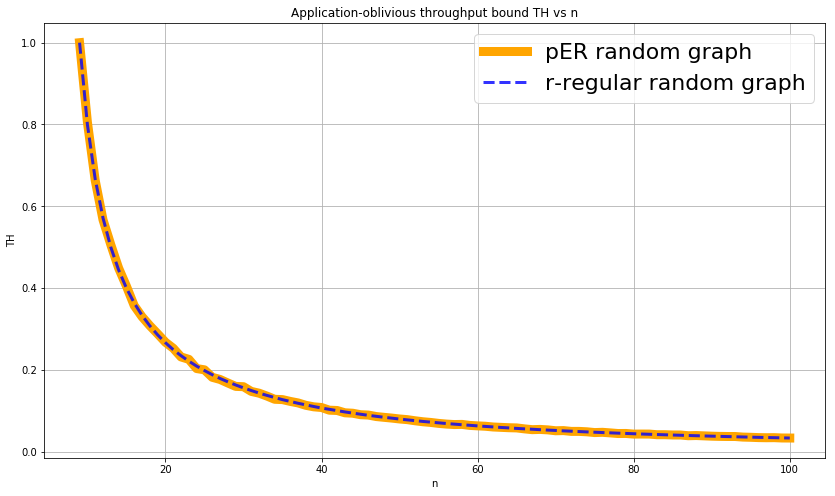

In [18]:
TH_pER = []
TH_r_r = []

r = 8
n_cycles = 50
# p = p(n) <- into the loop

for n in range(9,101):
    p=8/(n-1)
    v_f = n*(n-1)/2
  
    # TH_pER
    th_temp = []
    for _ in range(n_cycles):
        G = Random_Graph("p_ER", n, p) 
        th_temp.append(G.compute_throughput()) 
    
    TH_pER.append(np.mean(th_temp))
    
    # TH_r-regular
    th_temp = []
    for _ in range(n_cycles):
        G = Random_Graph('r_regular', n, r)
        th_temp.append(r/(G.estimate_h()*(n-1)))
        
    TH_r_r.append(np.mean(th_temp))
          
plt.figure(figsize=(14,8))
plt.plot(np.arange(9,101), TH_pER,'-',linewidth=9.0,label = "pER random graph", color = "orange")
plt.plot(np.arange(9,101), TH_r_r,'--',linewidth=3.0, label = "r-regular random graph",alpha=0.8, color = "blue")
plt.legend(loc = "upper right", prop={'size': 22})
plt.title("Application-oblivious throughput bound TH vs n")
plt.ylabel("TH")
plt.xlabel("n")
plt.grid()
# plt.savefig('fig_5.png')

As we can see, the simulation of the $TH$ w.r.t. $n$ follows the theoretical behaviour we expected, since the upper bounds of the throughputs for the pER random graph and the r-regular random graph are almost perfectly overlapping as $n$ increases.

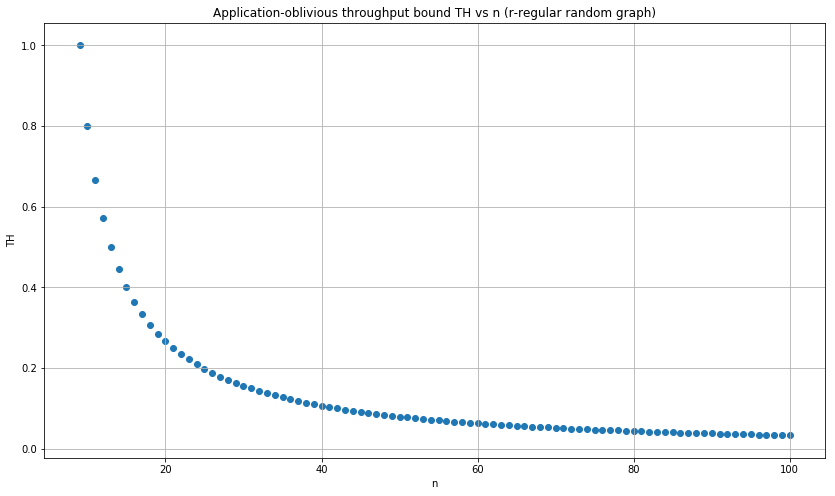

In [19]:
plt.figure(figsize=(14,8))
plt.scatter(np.arange(9,101), TH_r_r, label = "r-regular random gr")
plt.title("Application-oblivious throughput bound TH vs n (r-regular random graph)")
plt.ylabel("TH")
plt.xlabel("n")
plt.grid()
# plt.savefig('fig_5_1.png')

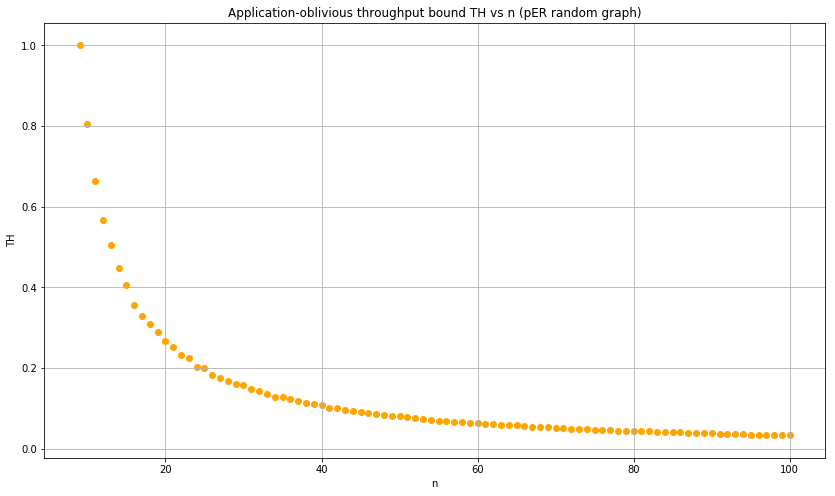

In [20]:
plt.figure(figsize=(14,8))
plt.scatter(np.arange(9,101), TH_pER,label = "pER random graph",color='orange')
plt.title("Application-oblivious throughput bound TH vs n (pER random graph)")
plt.ylabel("TH")
plt.xlabel("n")
plt.grid()
# plt.savefig('fig_5_2.png')